# 11장 Decision Tree (의사결정나무)
---
- Dates : Sep 04, 2024  
- Author : JaeEun Yoo
---

## Decision tree(의사결정나무)란?
- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것
- 스무고개와 같은 예/아니오 질문을 이어나가면서 학습
- 분류(Classification)와 회귀(Regression) 분석에 모두 적용 가능


![numpy array 01](./figures/dt_01.png)

-  타이타닉호의 탑승객의 생존여부

- 결정 트리에서 질문이나 정답은 노드(Node)라고 불림
- 한 번 분기 때마다 변수 영역을 두 개로 구분 (이진트리의 개념)

<br>
 
* 뿌리 마디(Root Node): 나무 구조가 시작되는 마디 전체 데이터로 이루어져 있음
* 중간 마디(Internal Node): 나무 구조의 중간에 있는 마디들
* 끝 마디(Terminal Node): 나무 구조의 끝에 위치하는 마디
* 결정 트리의 기본 아이디어는, Leaf Node가 가장 섞이지 않은 상태로 완전히 분류되는 것, 즉 복잡성(entorpy)이 낮도록 만드는 것


### Decision Tree의 장점
- 분석 결과를 해석하기 쉬움
- 변수 간의 상호작용과 비선형성을 반영하여 정확한 예측이 가능함
- 모델의 직관성과 가시성이 높아, 어떤 결정에 대한 이유를 설명하기 용이함


---
## 불순도(Impurity)

### 불순도란?
- 결정트리에서 분기기준을 선택하기 위해서는 불순도(impurity)라는 개념을 사용함
- 불순도란 **복잡성**을 의미하며, 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻함
- 다양한 개체들이 섞여 있을수록 불순도가 높아짐
- 현재의 불순도에 비해 자식 노드의 불순도가 감소하도록 설정해야 함

### 지니 불순도 (Gini impurity)
- 주어진 데이터 셋에서 서로 다른 분류들이 얼마나 섞여있는지 알려주는 값
- 지니 불순도가 높으면 서로 다른 분류들이 많이 섞여있고, 낮으면 순수한 데이터 1개의 값으로 이루어진 것에 가까움
- 지니 불순도의 **최대값은 0.5**

![numpy array 01](./figures/dt_02.png)

- pk = k에 속할 확률
- 범주 안에 빨간색 점 10개, 파란색 점이 6개 있을 때의 계산 예제

![numpy array 01](./figures/dt_03.png)

### 엔트로피 (Entropy)
- '주어진 집합의 혼잡도'를 의미
- **서로 다른 값이 섞여있으면 높고(1에 가까움)** 같은 값만이 존재할 수록 낮음(0에 가까움)

![numpy array 01](./figures/dt_04.png)

![numpy array 01](./figures/dt_05.png)

- 분기를 하였을 때, 이러한 불순도 함수의 값(지니 지수 또는 엔트로피 지수)이 줄어드는 방향으로 트리를 형성해야함

## 정보획득(Information gain)

- 현재 노드의 불순도와 자식노드의 불순도 차이를 Information Gain(정보 획득)이라 함
- 불순도가 1인 상태에서 0.7인 상태로 바뀌었다면 정보 획득(information gain)은 0.3
- 결정트리 구성 단계
1) Root 노드의 불순도 계산
2) 나머지 속성에 대해 분할 후 자식노드의 불순도 계산
3) 각 속성에 대한 Information Gain 계산 후 Information Gain(Root노드와 자식노드의 불순도 차이)이 최대가 되는 분기조건을 찾아 분기
4) 모든 leaf 노드의 불순도가 0이 될때까지 2,3을 반복 수행

---
## 가지치기 (pruning)

![numpy array 01](./figures/dt_06.png)

- 가지치기란 최대트리로 형성된 결정트리의 특정 노드 밑의 하부 트리를 제거하여 일반화 성능을 높히는 것
- 더 많은 가지가 생기지 않도록 최대 깊이, leaf 노드의 최대 개수, 한 노드가 분할하기 위한 최소 데이터 수 등을 제한함

---
## 실습 : 유방암 환자 분류하기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
cancer = load_breast_cancer()

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [6]:
cancer['data'].shape

(569, 30)

In [7]:
cancer['data'][0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [8]:
cancer['target'].shape

(569,)

In [9]:
cancer['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
X_train, X_test, y_train, y_test = \
train_test_split(cancer.data, cancer.target, stratify=cancer.target, test_size=0.2, random_state=123)

In [11]:
X_train.shape

(455, 30)

In [12]:
X_test.shape

(114, 30)

In [13]:
y_train.shape

(455,)

In [14]:
y_test.shape

(114,)

In [15]:
tree = DecisionTreeClassifier(max_depth=5)

In [16]:
tree

DecisionTreeClassifier(max_depth=5)

In [17]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [18]:
y_pred = tree.predict(X_test)

In [19]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1])

In [20]:
print("test set accuracy: {:.3f}".format(tree.score(X_test, y_test)))

test set accuracy: 0.974


In [21]:
from sklearn.metrics import classification_report, accuracy_score

# 테스트 데이터로 예측 수행
y_pred = tree.predict(X_test)

# 모델 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        42
           1       0.97      0.99      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [23]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [24]:
X_train[0]

array([1.094e+01, 1.859e+01, 7.039e+01, 3.700e+02, 1.004e-01, 7.460e-02,
       4.944e-02, 2.932e-02, 1.486e-01, 6.615e-02, 3.796e-01, 1.743e+00,
       3.018e+00, 2.578e+01, 9.519e-03, 2.134e-02, 1.990e-02, 1.155e-02,
       2.079e-02, 2.701e-03, 1.240e+01, 2.558e+01, 8.276e+01, 4.724e+02,
       1.363e-01, 1.644e-01, 1.412e-01, 7.887e-02, 2.251e-01, 7.732e-02])

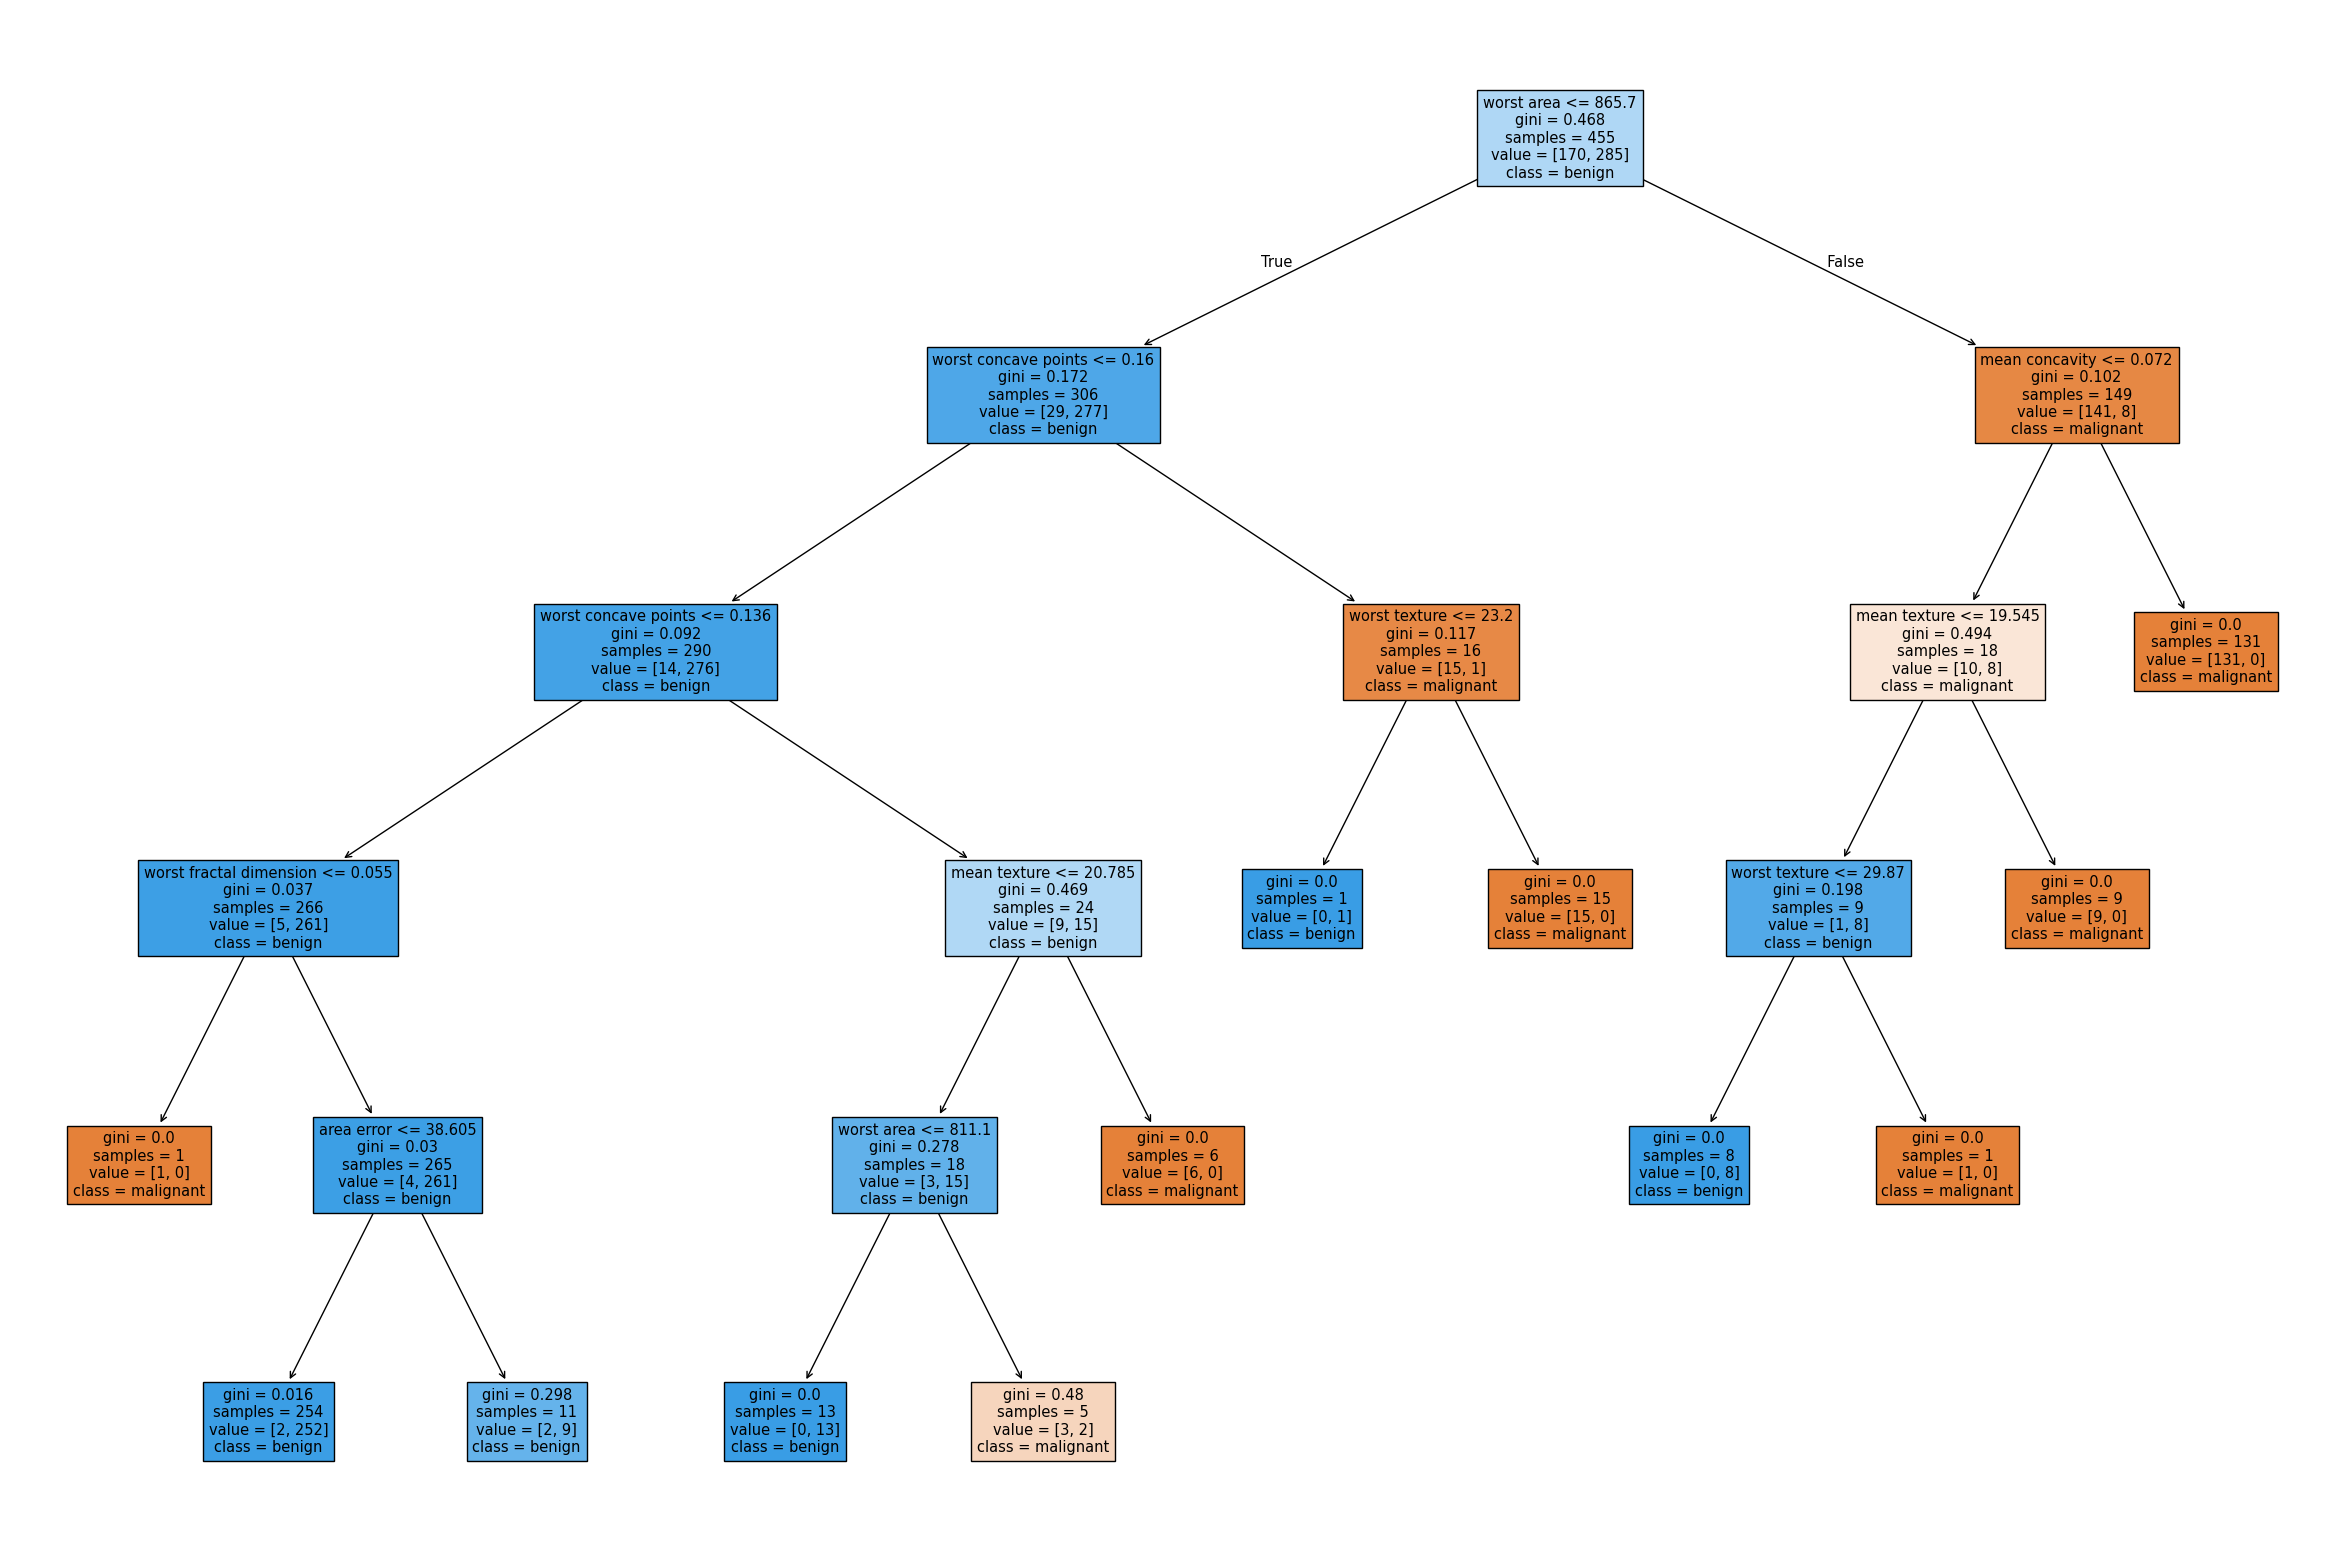

In [25]:
plt.figure(figsize=(30,20))
plot_tree(tree, filled=True, feature_names=cancer['feature_names'], class_names=cancer['target_names'])
plt.show()

> refer
- https://wooono.tistory.com/104
- https://lcyking.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98
- https://heeya-stupidbutstudying.tistory.com/entry/ML-%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree-%ED%8C%8C%ED%97%A4%EC%B9%98%EA%B8%B0